<a href="https://colab.research.google.com/github/ashutosh-DS25/Amazon_Prime_TV_Shows_and_Movies_Analysis/blob/main/Amazon_Prime_TV_Shows_and_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - Amazon Prime TV Shows and Movies



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This analysis is about understanding how content is performing on the platform using IMDb ratings and other features. The main aim was to see how different movies and shows are received by the audience. Instead of judging anything randomly, we tried to understand audience response through ratings, engagement and availability of content.

We explored the data using different factors like genre, production country and release year. We checked which genres are more available and how they are rated. We also studied country-wise performance and looked at the release timeline to understand how content has grown over the years. Along with that, we analyzed description patterns to see what kind of themes are common, and also checked how many contributors are usually involved in a title to understand production scale.

Overall, the goal was to identify clear patterns and use them to give practical suggestions. The recommendations are based on what the data is actually showing, not assumptions. The idea is to help in deciding what type of content can be improved, expanded or focused on for better growth.

# **GitHub Link -**

https://github.com/ashutosh-DS25/Amazon_Prime_TV_Shows_and_Movies_Analysis

# **Problem Statement**


**The platform has a large number of movies and shows, and all of them have IMDb ratings and other related details. But just having ratings is not enough. It is not clear how these ratings should be interpreted to make real decisions. Taking a simple average of all ratings does not clearly tell where the platform should focus or what needs improvement. So the main problem is to understand how to properly read and analyze these ratings in a meaningful way.**

**Another issue is that there is a huge variety of content available across different genres, countries and release years. It becomes difficult to decide which type of content is performing well, which areas are weak, and in what direction new content should be acquired. The platform needs clarity on where to focus more to gain better user attention and where quality improvement is required.**

**So the core problem is to identify common patterns in content performance and audience response, and use those patterns to guide future content strategy. The goal is to understand how the content is spread, how it is received by users, and in what direction the platform should move to improve engagement and overall performance.**

#### **Define Your Business Objective?**

Identify which genres show stronger audience engagement so that future investment can be focused on high performing genres while improving weaker ones. Another objective is to understand country wise content performance to decide from which international markets more content should be acquired to increase variety and global appeal. Also to study release year trends and overall content growth to understand expansion patterns and support future content planning decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [155]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS
import re

# Install if not available
#!pip install wordcloud

### Dataset Loading

In [156]:
# Load Dataset
titles = pd.read_csv('https://raw.githubusercontent.com/ashutosh-DS25/Amazon_Prime_TV_Shows_and_Movies_Analysis/refs/heads/main/titles.csv')
credits = pd.read_csv('https://raw.githubusercontent.com/ashutosh-DS25/Amazon_Prime_TV_Shows_and_Movies_Analysis/refs/heads/main/credits.csv')

### Dataset First View

In [157]:
# Dataset First Look
titles.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
7880,tm1126572,Breakdown,MOVIE,A mysterious virus has wiped out much of the w...,2020,NaN,92,"['thriller', 'horror']",['US'],NaN,tt3899930,2.6,74.0,2.687,NaN
3883,tm99231,Simha,MOVIE,The film starts with the story of the younger ...,2010,NaN,156,"['drama', 'action']",['IN'],NaN,tt1582604,6.0,1872.0,1.646,5.2
3028,ts17343,Always Greener,SHOW,Every city-dweller daydreams about dropping ou...,2001,NaN,44,"['drama', 'comedy']",['AU'],2.0,tt0295064,7.9,300.0,1.920,NaN
3126,ts34311,Ultraseven X,SHOW,Ultraseven X is the 23rd entry in the Tsuburay...,2007,TV-14,24,"['action', 'drama', 'horror', 'scifi', 'thrill...",['JP'],1.0,tt1081848,7.2,72.0,0.600,10.0
6408,tm336860,Friendly Beast,MOVIE,A restaurant owner going over the edge when an...,2018,NaN,98,"['horror', 'crime', 'thriller']",['BR'],NaN,tt5126274,6.3,1406.0,4.105,6.4
320,tm156591,Irish Luck,MOVIE,A spunky young bellhop investigates the murder...,1939,NaN,58,"['comedy', 'action', 'crime']",['US'],NaN,tt0031495,5.5,204.0,0.600,5.5
9341,tm1024741,One More Flip,MOVIE,A final drug deal go wrong landing Demarco Bea...,2021,NaN,90,"['drama', 'crime']",['US'],NaN,tt14128938,6.4,72.0,2.270,4.0
1934,tm53974,Betrayed,MOVIE,An FBI agent (Debra Winger) falls in love with...,1988,R,127,"['thriller', 'drama', 'crime']","['US', 'JP']",NaN,tt0094731,6.3,6254.0,7.525,6.1
1445,tm47612,The Pusher,MOVIE,A detective investigating the murder of a hero...,1960,NaN,81,"['drama', 'crime']",['US'],NaN,tt0054219,6.4,96.0,1.855,5.6
1486,tm14573,The Wicked Dreams of Paula Schultz,MOVIE,A beautiful East German Olympic hopeful pole-v...,1968,NaN,113,['comedy'],['US'],NaN,tt0063805,4.4,261.0,1.646,6.0


In [158]:
credits.sample(10)

,person_id,id,name,character,role
34389,13671,tm23704,John Savage,Beast/Prince,ACTOR
68010,4881,tm186605,Kristen Wiig,Angela,ACTOR
33791,498501,tm175464,Felicity Mithen,Hot Tub Girl,ACTOR
66780,632487,tm173443,Mellanie Hubert,Sally Lynch,ACTOR
56610,352034,tm35974,Meighan Gerachis,Dawn,ACTOR
74627,9267,tm178480,Dina Meyer,Kay,ACTOR
103027,1334262,tm827341,Ygor Manoel,NaN,ACTOR
18475,631926,tm82291,Peter Paul Eastman,Man at Premiere (uncredited),ACTOR
2137,15259,tm67825,Erskine Sanford,Dr. Henry Bender,ACTOR
33217,87165,ts2760,Jo Wyatt,Hannah / Lizzie (voice),ACTOR


### Dataset Rows & Columns count

In [159]:
# Dataset Rows & Columns count
titles.shape

(9871, 15)

In [160]:
credits.shape

(124235, 5)

### Dataset Information

In [161]:
# Dataset Info
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

Info of the titles table shows that all the columns have correct data type but the null values is something that we will have to work upon is to clean the data first before analysing the data.Description, release_year, age_certification, seasons and all imbd & tmdb related columns have null values.

#### Duplicate Values

In [162]:
# Dataset Duplicate Value Count
titles.duplicated().sum()

np.int64(3)

In [163]:
# Duplicate rows
titles[titles.duplicated]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


In [164]:
# Remove duplicate values
titles.drop_duplicates(inplace = True)

In [165]:
# Count of duplicate rows
credits.duplicated().sum()

np.int64(56)

In [166]:
# Drop duplicates
credits.drop_duplicates(inplace = True)

#### Missing Values/Null Values

In [167]:
# Missing Values/Null Values Count
titles.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6484
runtime,0
genres,0
production_countries,0
seasons,8511


<Axes: >

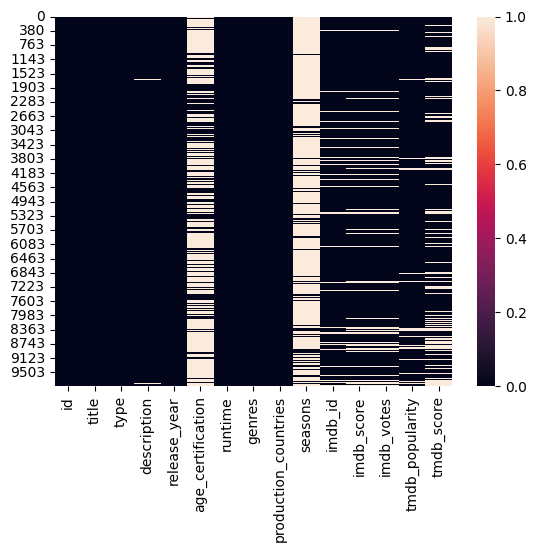

In [168]:
# Visualizing the missing values
sns.heatmap(titles.isnull())


In [169]:
# Missing Values/Null Values Count
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16277
role,0


<Axes: >

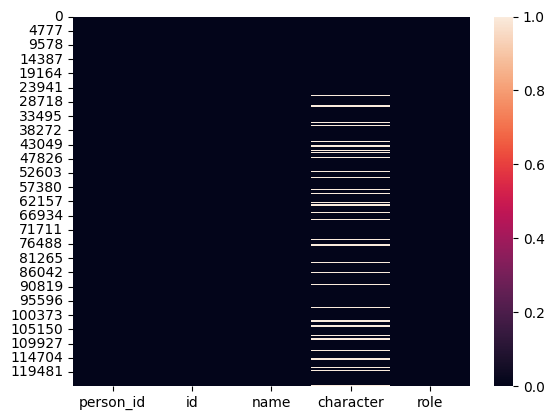

In [170]:
# Visualizing the missing values
sns.heatmap(credits.isnull())

In [171]:
# Drop character column because of missing values and not very important for analysis
credits = credits.drop(columns = ['character'])

### What did you know about your dataset?

Dataset contains information about movies and TV shows available on the platform, along with ratings, votes, genres, countries and release years. The data shows both content availability and audience response. It helps to compare how different types of content are performing. Overall, the data is useful to study trends and user engagement.

## ***2. Understanding Your Variables***

In [172]:
# Dataset Columns
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [173]:
credits.columns

Index(['person_id', 'id', 'name', 'role'], dtype='object')

In [174]:
# Dataset Describe
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9868.000000,9868.000000,1357.000000,8847.000000,8.837000e+03,9321.000000,7788.000000
mean,2001.345561,85.979124,2.791452,5.976534,8.536485e+03,6.912168,5.984117
std,25.792295,33.515714,4.148958,1.344028,4.592768e+04,30.008727,1.518040
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1996.000000,65.000000,1.000000,5.100000,1.180000e+02,1.234000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.640000e+02,2.537000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.237000e+03,5.640000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

The dataset has both categorical and numerical variables. Categorical variables include genre, show type and production country, while numerical variables include IMDb score, votes, runtime and release year. Some columns like genres and countries contain multiple values in list format. Rating and vote columns help in understanding content performance.

### Check Unique Values for each variable.

In [175]:
# Check Unique Values for each variables.
for i in titles.columns:
  if titles[i].nunique()<50:
    print(i)
    print(titles[i].unique())
    print('*' * 20)
    print()

type
['SHOW' 'MOVIE']
********************

age_certification
['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']
********************

seasons
[26. nan 18.  9. 31.  6. 12. 49.  3. 11. 51. 22.  8.  2.  4.  1.  7. 16.
 24. 35.  5. 34. 13. 15. 42. 33. 10. 25. 14. 19. 21. 17. 28.]
********************



In [176]:
for col in titles.columns:
  if titles[col].nunique() < 30:
    print(titles[col].value_counts())
    print('*' * 20)
    print()

type
MOVIE    8511
SHOW     1357
Name: count, dtype: int64
********************

age_certification
R        1249
PG-13     588
PG        582
G         269
TV-MA     217
TV-14     188
TV-PG      91
TV-Y       78
TV-G       57
TV-Y7      52
NC-17      13
Name: count, dtype: int64
********************



## 3. ***Data Wrangling***

### Data Wrangling Code

In [177]:
# total rows in titles
total_col = titles.shape[0]

# find percentage of null values in each column
for col in titles.columns:
  col_null = titles[col].isnull().sum()
  print(col,':', (col_null*100)/total_col)


id : 0.0
title : 0.0
type : 0.0
description : 1.2059181191730848
release_year : 0.0
age_certification : 65.70733684637212
runtime : 0.0
genres : 0.0
production_countries : 0.0
seasons : 86.2484799351439
imdb_id : 6.759221726793677
imdb_score : 10.34657478719092
imdb_votes : 10.447912444264288
tmdb_popularity : 5.543169841913255
tmdb_score : 21.07823267126064


Age Certification, Season and tmdb score columns are evidently having null values more than 20% so dropping these is the most feasible option.
Imdb id is not an important column for analysis so we can drop that too

In [178]:
# drop columns

titles = titles.drop(columns = ['seasons', 'age_certification','tmdb_score', 'imdb_id'])

In [179]:
# Check all the rows with null values in specific columns
titles[titles[['imdb_score','imdb_votes','tmdb_popularity']].isnull().any(axis=1)]


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity
42,tm119274,The Outlaw,MOVIE,Newly appointed sheriff Pat Garrett is pleased...,1943,116,['western'],['US'],NaN,NaN,7.503
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,56,[],[],NaN,NaN,0.600
99,tm16906,San Pietro,MOVIE,This documentary movie is about the battle of ...,1945,32,"['war', 'documentation']",['US'],NaN,NaN,2.659
213,tm57795,The Stolen Jools,MOVIE,Famous actress Norma Shearer's jewels are stol...,1931,20,['comedy'],['US'],NaN,NaN,2.892
298,tm15681,Why We Fight: War Comes to America,MOVIE,The seventh and final film of Frank Capra's Wh...,1945,70,"['war', 'documentation']",['US'],NaN,NaN,1.840
...,...,...,...,...,...,...,...,...,...,...,...
9861,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",2021,25,[],[],NaN,NaN,0.600
9865,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,17,[],[],NaN,NaN,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,55,['comedy'],['US'],NaN,NaN,0.600
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,116,['crime'],['IN'],NaN,NaN,1.960


In [180]:
# remove null values
blank_index = titles[titles[['imdb_score','imdb_votes','tmdb_popularity']].isnull().any(axis=1)].index

titles = titles.drop(blank_index, axis= 0)

In [181]:
# find percentage of null values in each column after removing
for col in titles.columns:
  col_null = titles[col].isnull().sum()
  print(col,':', (col_null*100)/total_col)

# total remaining rows after last step
print('total_rows: ', titles.shape[0])

id : 0.0
title : 0.0
type : 0.0
description : 0.05066882853668423
release_year : 0.0
runtime : 0.0
genres : 0.0
production_countries : 0.0
imdb_score : 0.0
imdb_votes : 0.0
tmdb_popularity : 0.0
total_rows:  8514


In [182]:
# fill null values in description
titles['description'] = titles['description'].fillna('Not available')

In [183]:
#handle empty lists in 'country' and 'genre' if any
titles[titles['production_countries']=='[]']

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity
1216,tm73861,Jack Frost,MOVIE,"Pardon-me Pete, the official groundhog of Grou...",1979,48,"['fantasy', 'animation', 'comedy', 'family', '...",[],6.9,3968.0,5.663
1357,ts131586,Tomorrow's Joe 2,SHOW,Yabuki Joe is left downhearted and hopeless af...,1980,24,"['drama', 'sport', 'animation', 'action']",[],8.8,453.0,0.600
1398,tm186229,Moonfire,MOVIE,Truckers battle a Nazi who has hidden out in M...,1973,107,"['action', 'drama']",[],4.5,117.0,1.372
1613,tm81340,Aasai Mugam,MOVIE,"What the movie has in store for you, wait and ...",1965,157,['drama'],[],6.6,20.0,0.600
1622,tm18941,A Real American Hero,MOVIE,When two boys are killed and two girls are bli...,1978,94,"['drama', 'crime']",[],5.6,305.0,0.883
...,...,...,...,...,...,...,...,...,...,...,...
9854,tm1076901,Jaan! Jaan Loge Kya?,MOVIE,Rahul and Sonia are very happy after marriage....,2021,114,['drama'],[],3.8,12.0,0.600
9860,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,2021,74,[],[],7.4,231.0,0.600
9862,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,122,['drama'],[],8.4,1188.0,0.945
9864,tm822572,Gun and a Hotel Bible,MOVIE,"Based on the original play, Gun and a Hotel Bi...",2021,58,['drama'],[],4.0,142.0,0.954


In [184]:
# Total empty values
titles[titles['production_countries']=='[]'].shape[0]

326

In [185]:
titles['production_countries'].value_counts()

,count
production_countries,
['US'],4436
['IN'],893
['GB'],587
[],326
['CA'],295
...,...
['TC'],1
"['AR', 'US']",1
"['IT', 'ES', 'DE']",1


This data set is based on US liabrary of Amazon prime, so filling the empty values with the mode i.e. US will be a good option

In [186]:
titles['production_countries'] = titles['production_countries'].replace({'[]':"['US']", '[XX]':"['US']",'["XX"]':"['US']"})

In [187]:
# Check all values in genre
titles['genres'].value_counts()

,count
genres,
['drama'],666
['comedy'],516
['documentation'],355
"['drama', 'romance']",173
['horror'],170
...,...
"['reality', 'action', 'european']",1
"['drama', 'comedy', 'sport', 'documentation']",1
"['romance', 'drama', 'music', 'comedy']",1


In [188]:
# Find empty values in genres
titles[titles['genres']=='[]']

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity
382,tm83465,Sunny,MOVIE,Sunny is a 1941 film American film directed by...,1941,98,[],['US'],5.4,196.0,1.374
581,tm406498,Nam Iruvar,MOVIE,Sukumar is misled into investing all his savin...,1947,153,[],['IN'],6.3,14.0,0.600
640,tm1733,Adventure in Iraq,MOVIE,Five Allied soldiers in an airplane flying to ...,1943,65,[],['US'],5.0,172.0,0.950
694,tm4340,Career Girl,MOVIE,"Joan Terry, from Kansas City, comes to New Yor...",1944,69,[],['US'],5.5,184.0,0.664
1385,tm374784,Une Infinie Tendresse,MOVIE,French documentary on the world of a brain-dam...,1968,92,[],['FR'],8.9,29.0,0.600
1584,tm85210,Escape from Angola,MOVIE,Adventure - Moving to the unspoiled terrain of...,1976,96,[],['US'],3.7,73.0,0.600
1706,tm772186,Sahodari,MOVIE,Pazhani has two children — Chandiran and Meena...,1959,175,[],['US'],5.4,6.0,0.600
1790,tm769574,Bhalu,MOVIE,Bhalu is a Marathi movie released in 1980. Pro...,1980,134,[],['IN'],6.5,18.0,0.600
2058,ts88912,The Prisoner of Zenda,SHOW,An Englishman on a Ruritarian holiday must imp...,1984,26,[],['AU'],7.0,55.0,2.255
2142,tm136989,Enna Petha Raasa,MOVIE,"Film starring Vinu Chakravarthy, Goundamani an...",1989,137,[],['IN'],5.7,14.0,0.600


In [189]:
# Number of empty values
titles[titles['genres']=='[]'].shape[0]

34

There and 34 empty values in genres and it is a important column so filling with mode might create a bias so we will drop these rows

In [190]:
# Remove rows having an empty value
titles = titles[titles['genres'] != '[]']

### What all manipulations have you done and insights you found?

In the data cleaning step, I first checked the percentage of null values in each column. Columns like seasons, age_certification and tmdb_score had more than 20 percent null values, so I dropped them. I also removed imdb_id because it was not useful for analysis. After that, I removed rows where important columns like imdb_score, imdb_votes and tmdb_popularity had null values. I filled missing description values with “Not available”. For production_countries, I replaced empty values with US since the dataset is based on the US library. For genres, since it is an important column and only a few rows were empty, I removed those rows instead of filling them to avoid bias.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

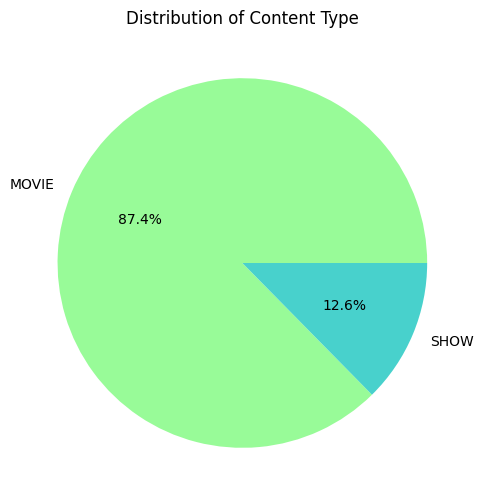

In [191]:
# pie chart to visualize the percentage of movies and shows out of total titles
type_counts = titles['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=['palegreen', 'mediumturquoise']   # custom colors
)
plt.title("Distribution of Content Type")
plt.show()


##### 1. Why did you pick the specific chart?

Pie Chart is a good choice when it comes to comparing the presence of different categories in a low cardinality column.

##### 2. What is/are the insight(s) found from the chart?

**Bar chart is clearly showing the dominance of movies on the platform and shows are only 13% of total programs.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **This is an important insight with respect to business because worldwide shows are gaining popularity because of their time length but on amazon prime shows category is under exploited so the platform should focus on exploring the shows.**

**In the later part of analysis we will check the performace of current shows that will help going in right direction with respect to shows.**

#### Chart - 2

In [192]:
#Distribution of genres by count
# Iterate over each row and create a dictionary containing every genre and its total count in data for plotting
genre_count = {}
for row in titles['genres']:
  for genre in eval(row):
    if genre in genre_count:
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(genre_count)
genre_order = sorted(genre_count, key = lambda x: genre_count[x], reverse = True)


sorted_genre_count = dict(sorted(genre_count.items(), key = lambda x: x[1], reverse = True))
print(sorted_genre_count)

{'comedy': 2732, 'family': 694, 'animation': 409, 'action': 1742, 'fantasy': 528, 'horror': 981, 'drama': 4360, 'war': 313, 'western': 474, 'european': 698, 'romance': 1692, 'thriller': 1968, 'crime': 1194, 'history': 370, 'sport': 222, 'scifi': 658, 'documentation': 910, 'music': 387, 'reality': 118}
{'drama': 4360, 'comedy': 2732, 'thriller': 1968, 'action': 1742, 'romance': 1692, 'crime': 1194, 'horror': 981, 'documentation': 910, 'european': 698, 'family': 694, 'scifi': 658, 'fantasy': 528, 'western': 474, 'animation': 409, 'music': 387, 'history': 370, 'war': 313, 'sport': 222, 'reality': 118}


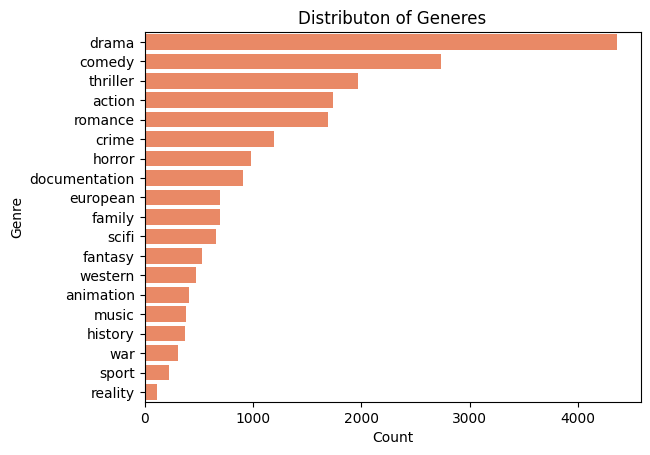

In [193]:
# plot count of every genre
sns.barplot(y = sorted_genre_count.keys(), x = sorted_genre_count.values(), color  = 'coral')
plt.title('Distributon of Generes')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

**A bar chart is appropriate here because we are comparing multiple genres based on their counts. Bar charts allow clear comparison across many categories and help identify which genre has the highest or lowest number of titles.**

##### 2. What is/are the insight(s) found from the chart?

**Drama has the highest number of titles and clearly dominates the platform. Comedy, thriller, action, and romance are also common. Some genres such as history, war, and reality have lower availability.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This helps evaluate content distribution. The platform can maintain quality in high supply genres and explore increasing content in lower supply but potentially promising genres.**

#### Chart - 3

In [194]:
#Distribution of countries by count
# Iterate over each row and create a dictionary containing every country and its total count in data for plotting
countries_count = {}
for row in titles['production_countries']:
  for country in eval(row):
    if country in countries_count:
      countries_count[country] += 1
    else:
      countries_count[country] = 1

sorted_countries_count = dict(
    sorted(countries_count.items(),key = lambda x: x[1], reverse = True)
)
print(sorted_countries_count)

{'US': 5249, 'IN': 909, 'GB': 830, 'CA': 498, 'FR': 237, 'JP': 171, 'AU': 165, 'DE': 164, 'IT': 138, 'CN': 102, 'ES': 100, 'XX': 92, 'HK': 69, 'MX': 59, 'KR': 53, 'RU': 46, 'BE': 44, 'IE': 43, 'BR': 34, 'IL': 31, 'NZ': 30, 'NL': 27, 'ZA': 27, 'NO': 24, 'DK': 23, 'SE': 22, 'TH': 22, 'CH': 20, 'CZ': 20, 'AR': 20, 'NG': 20, 'PL': 17, 'PH': 16, 'SK': 15, 'CL': 13, 'LU': 13, 'AT': 13, 'IR': 11, 'GR': 10, 'TW': 9, 'CO': 9, 'RO': 9, 'YU': 8, 'HU': 8, 'FI': 8, 'AE': 8, 'UA': 8, 'PR': 7, 'VE': 7, 'AF': 7, 'MY': 7, 'MA': 7, 'SU': 6, 'ID': 6, 'VN': 6, 'EG': 5, 'TR': 5, 'IS': 5, 'RS': 5, 'PT': 4, 'UY': 4, 'SG': 4, 'BO': 3, 'QA': 3, 'KE': 3, 'MN': 3, 'GE': 3, 'PA': 3, 'EE': 3, 'LI': 2, 'XC': 2, 'SI': 2, 'BA': 2, 'BG': 2, 'JM': 2, 'LT': 2, 'KZ': 2, 'BD': 2, 'FJ': 2, 'TT': 2, 'PK': 2, 'PS': 2, 'HR': 2, 'LV': 2, 'CR': 2, 'LB': 2, 'AL': 2, 'XK': 2, 'CU': 2, 'CI': 1, 'AN': 1, 'MC': 1, 'SZ': 1, 'TC': 1, 'TN': 1, 'GQ': 1, 'MT': 1, 'SO': 1, 'United States of America': 1, 'UG': 1, 'DO': 1, 'SV': 1, 'AQ': 1,

In [195]:
# select top 20 countries to visualize
top_20_countries = dict(list(sorted_countries_count.items())[:20])
print(top_20_countries)

{'US': 5249, 'IN': 909, 'GB': 830, 'CA': 498, 'FR': 237, 'JP': 171, 'AU': 165, 'DE': 164, 'IT': 138, 'CN': 102, 'ES': 100, 'XX': 92, 'HK': 69, 'MX': 59, 'KR': 53, 'RU': 46, 'BE': 44, 'IE': 43, 'BR': 34, 'IL': 31}


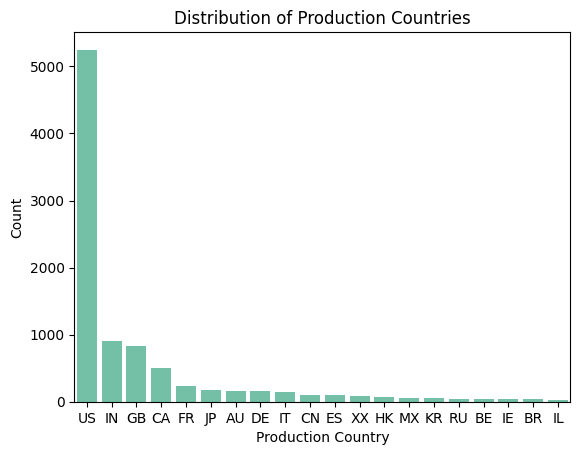

In [196]:
# plot a barchart to visualize contibution by country
sns.barplot(x = top_20_countries.keys(), y = top_20_countries.values(), color = 'mediumaquamarine')
plt.title('Distribution of Production Countries')
plt.xlabel('Production Country')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar chart is suitable because we are comparing different countries based on the number of titles produced.**

##### 2. What is/are the insight(s) found from the chart?

**United States contributes the most content as this data belongs to american library.  India appears as the second largest contributor even after a very different laguage spoken. Britain, Canada, France, and Japan also have strong representation.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To provide more variety in content platform can introduce more content from the prominent countries.

#### Chart - 4

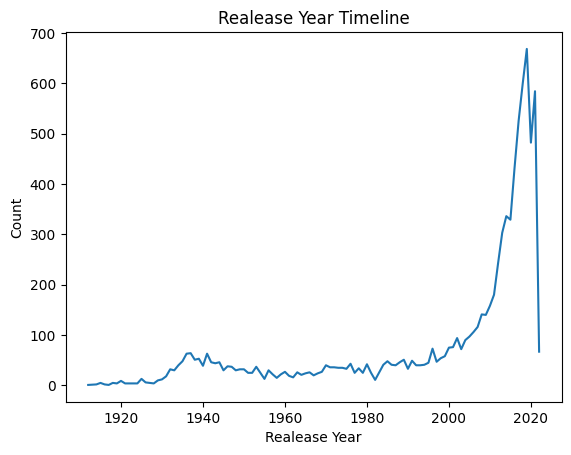

In [197]:
# plot a line plot to visualise release year of titles
release_count = titles['release_year'].value_counts().reset_index()
release_count = release_count.sort_values(by = 'release_year')
plt.plot(release_count['release_year'], release_count['count'])
plt.title('Realease Year Timeline')
plt.xlabel('Realease Year')
plt.ylabel('Count')
plt.show()


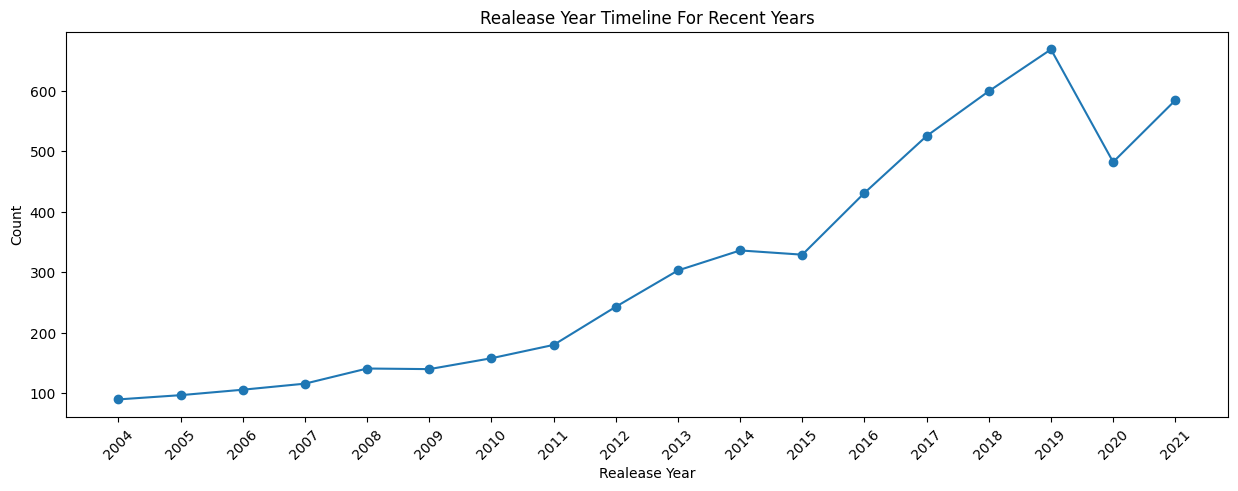

In [198]:
# plot the line chart to focus on release year after 2004
release_2005_on = release_count[release_count['release_year'].between(2004,2021)]
plt.figure(figsize = (15,5))
plt.plot(release_2005_on['release_year'], release_2005_on['count'], marker=  'o')
plt.xticks(release_2005_on['release_year'], rotation=45)
plt.title('Realease Year Timeline For Recent Years')
plt.xlabel('Realease Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**A line chart is chosen because it is best for showing trends over time. Since release year is a continuous time variable, a line chart helps visualize growth patterns and changes across years**

##### 2. What is/are the insight(s) found from the chart?

**Content availability increases significantly for post 2006 releases that shows strong growth after 2016. This also reflects the expansion of OTT platforms and digital content production that is a world wide trend.**
**A closer look at the long-term trend reveals that after 2005, the increase in content addition was gradual and relatively steady. However, post-2011, the pace of growth visibly accelerated, indicating a stronger acquisition and expansion strategy. The most significant surge appears after 2015, where a clear boom in content addition is observed, suggesting aggressive scaling of the platform’s content library.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This trend analysis helps in understanding the platform’s current market position and evaluating the pace at which content is being added over the years. By examining the year-wise growth pattern, it becomes possible to assess whether the platform is expanding its content library at a competitive and sustainable rate.**

**The increasing trend in content addition reflects a positive growth trajectory and supports long-term expansion strategy. However, the noticeable decline in overall content addition during 2020 indicates a potential disruption or slowdown in acquisition strategy.**

**Regularly tracking this trend enables the platform to measure its growth momentum, compare it with industry standards, and take proactive actions to maintain a consistent upward trajectory.**

**Monitoring such phased growth patterns is essential, as it helps identify periods of strategic expansion and momentum shifts. By understanding when and how these growth accelerations occurred, the platform can design future strategies to replicate similar high-growth phases.**

#### Chart - 5

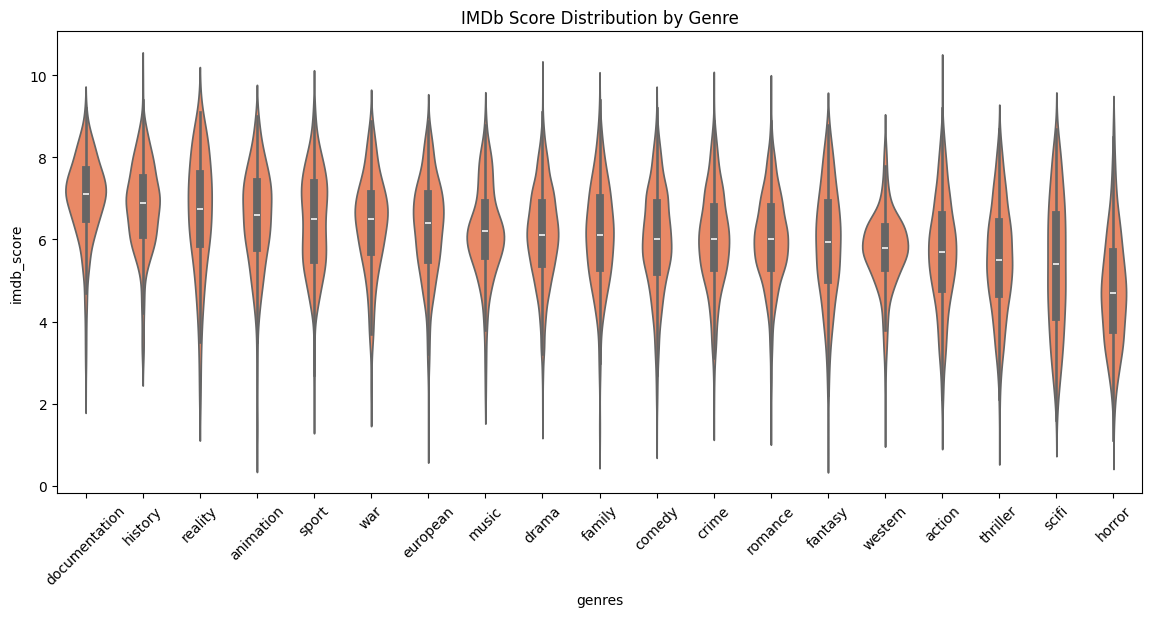

In [199]:
# slice the genres and score columns
genre_score = titles[['id','genres','imdb_score','imdb_votes','tmdb_popularity']].copy()
genre_score['genres'] = genre_score['genres'].apply(ast.literal_eval)

# make a seperate dataframe with all the genres in different rows ans sort by median score
Genre_S_exploded = genre_score.explode('genres').reset_index()
order = Genre_S_exploded.groupby('genres')['imdb_score'].median().sort_values(ascending = False).index

# plot violinplot to visualize distribution of imdb score for each genre
plt.figure(figsize=(14,6))
sns.violinplot(x='genres', y='imdb_score', order = order,data= Genre_S_exploded,color  = 'coral')

plt.xticks(rotation=45)
plt.title("IMDb Score Distribution by Genre")
plt.show()


##### 1. Why did you pick the specific chart?

**Violin plot is useful because it shows the distribution of ratings for each genre, not just the average. It helps visualize spread and density of ratings within each category.**

##### 2. What is/are the insight(s) found from the chart?

**Documentation is the highest rated genre based on median rating. In the count plot it was only sixth in terms of availability on the platform. This shows that documentation content performs very well in terms of audience rating even though its presence is limited. The ratings in documentation are also very consistent as most values are concentrated around the median.**

**The next top rated genres are reality, history and animation. However, the number of titles available under these genres is relatively low. Because of this lower availability, we cannot clearly conclude that highly available genres such as drama, comedy and crime are performing worse. At the same time, genres like sci fi, thriller and action are sufficiently available on the platform but their median ratings are lower compared to other genres.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can help in creating a positive business impact. Since documentation has high and consistent ratings but lower availability, the platform can explore adding more content in this genre to attract and retain viewers. Similarly, reality, history and animation also show strong rating performance, so selective expansion in these genres can improve overall platform perception.**

**On the other hand, there are signals that may lead to negative growth if not addressed. Some of the most highly available genres such as drama, comedy, crime, sci fi, thriller and action have comparatively lower ratings. If these genres continue to receive lower audience ratings over time, it may reduce long term user interest and engagement. Continuous low ratings in highly available categories can affect overall brand perception and subscriber retention. Therefore, content quality in these genres should be reviewed and improved to prevent long term negative impact.**

#### Chart - 6

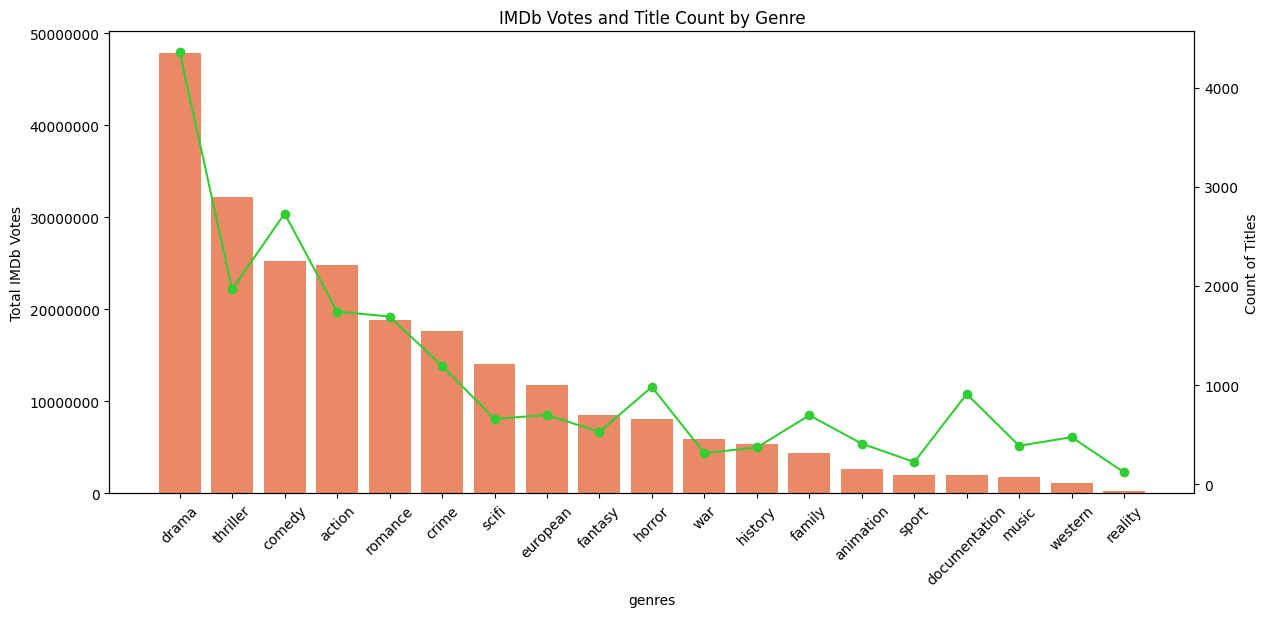

In [200]:
# calculate total IMDb votes per genre and sort them in descending order for plotting
genre_vote = Genre_S_exploded.groupby('genres')['imdb_votes'].sum()
order = genre_vote.sort_values(ascending = False).index

plt.figure(figsize=(14,6))

# plot the sum of votes for each genre on primary axis
ax1 = sns.barplot(x=genre_vote.index, y=genre_vote.values, order = order, color  = 'coral')

genre_count = Genre_S_exploded.groupby('genres')['imdb_votes'].count()

# create a secondary y-axis to overlay the count of titles per genre
ax2 = ax1.twinx()
ax2.plot(order, genre_count[order], marker = 'o',color = 'limegreen')


plt.title("IMDb Votes and Title Count by Genre")
ax1.tick_params(axis='x', rotation=45)
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.set_ylabel("Total IMDb Votes")
ax2.set_ylabel("Count of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

**Bar chart is used to compare total votes across different genres. The line chart is added to represent the count of titles across genres so that we can easily observe the trend and relationship between availability and engagement in the same visualization.**

##### 2. What is/are the insight(s) found from the chart?

**This chart shows that drama is not only highly available on the platform but also receives strong engagement in terms of total votes. Thriller, action, crime, sci fi, European and fantasy also attract significant attention compared to their availability. This means these genres are successful in drawing audience interest.**

**However, none of these highly engaging genres are among the top rated genres. At the same time, documentary and family genres have received good ratings in previous plots but their engagement and visibility are relatively lower. This suggests that users may not have explored these genres much despite their strong rating performance.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can help in creating a positive business impact. Since documentary and family genres have good ratings but lower engagement, the platform can make them more visible and promote them better to capture more audience attention. Increasing their visibility can improve overall user satisfaction and content discovery.**

**On the other hand, there is a potential negative growth signal. Some genres such as drama, thriller, action and crime receive high engagement but do not rank among the top rated genres. If the quality in these highly consumed genres is not improved, continuous moderate or lower ratings may reduce long term audience interest.**

#### Chart - 7

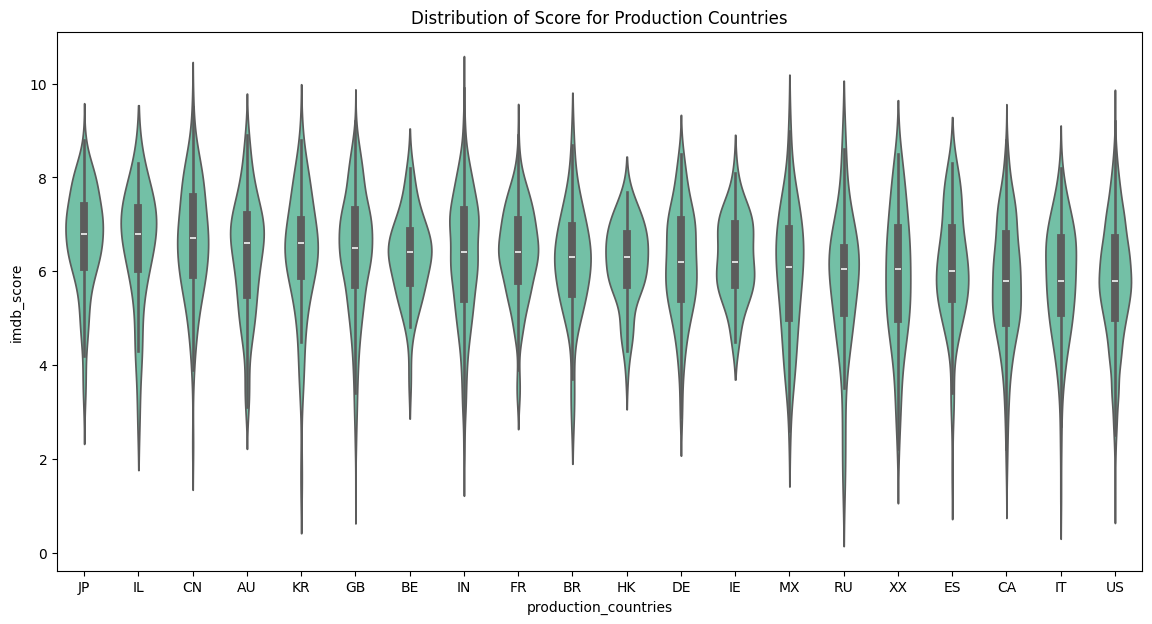

In [201]:
# slice selected columns
country_scores = titles[['id','production_countries','imdb_score','imdb_votes','tmdb_popularity']].copy()

# explode by country to get list values in different rows
country_scores['production_countries'] = country_scores['production_countries'].apply(ast.literal_eval)
country_s_exploded = country_scores.explode('production_countries').reset_index(drop = True)

# filter data of top 20 countries to visualise
country_s_exploded = country_s_exploded[country_s_exploded['production_countries'].isin(top_20_countries.keys())]
country_order = country_s_exploded.groupby('production_countries')['imdb_score'].median().sort_values(ascending = False).index
plt.figure(figsize = (14,7))

# plot violinplot
sns.violinplot(x= country_s_exploded['production_countries'], y = country_s_exploded['imdb_score'], order = country_order, color = 'mediumaquamarine')
plt.title('Distribution of Score for Production Countries')
plt.show()

##### 1. Why did you pick the specific chart?

**A violin plot is used because it shows the full distribution, range and density of IMDb scores across different production countries.**

##### 2. What is/are the insight(s) found from the chart?

**The chart shows that content from Japan and Canada has the highest overall rating among the top countries. The spread of ratings for Japan is also relatively narrow, which indicates consistent and stable audience response. This suggests that Japanese content is both well received and reliable in terms of quality.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights from this chart can directly support business decisions. Content from Japan and Canada is highly rated, which means audience response is strong and positive. The platform should consider bringing more shows from these countries to strengthen overall quality perception and user satisfaction.At the same time, content from the United States shows some ratings below three, which is an alarming sign. Titles with ratings below three should be reviewed immediately, and similar patterns of low quality content should be avoided in future acquisitions, as they can reduce platform credibility and long term audience trust.Similarly, shows that are rated between eight and ten should be promoted and expanded.**

#### Chart - 8

In [202]:
# Chart - 8 visualization code

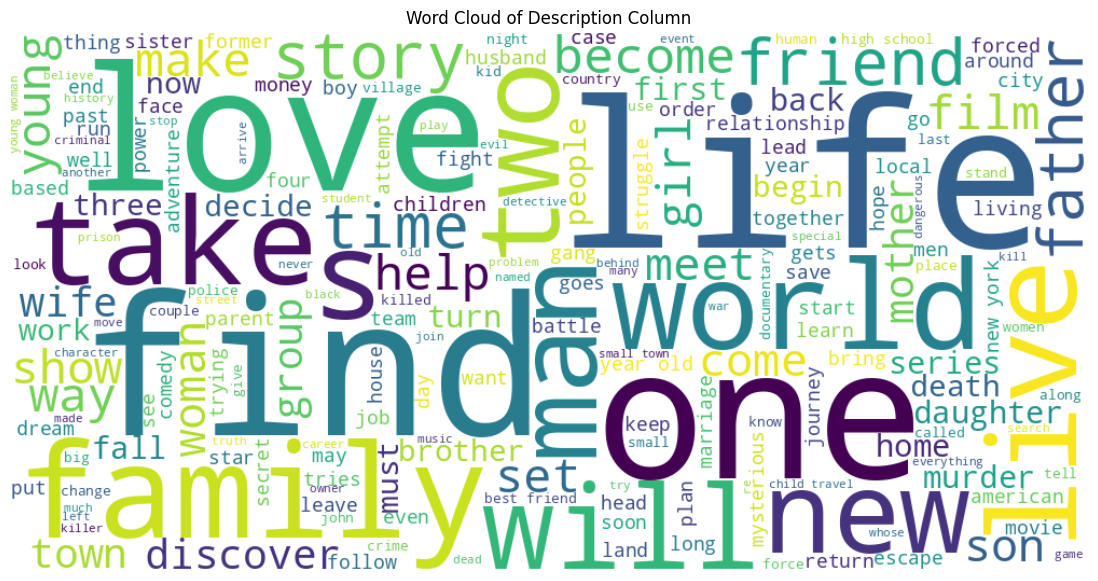

In [203]:
# combine all descriptions into one text
text = " ".join(titles["description"].dropna().astype(str))

# remove all values other than alphabets and space
text = re.sub(r"'s", "", text)
text = re.sub(r"[^a-zA-Z ]", " ", text)
text = text.lower()

# create word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=stopwords,
    max_words=200
).generate(text)

# plot word cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Description Column")
plt.show()


##### 1. Why did you pick the specific chart?

**A word cloud is used to identify the most frequently occurring words in the description column. It helps in understanding the dominant storytelling themes across the platform in a simple visual way.**

##### 2. What is/are the insight(s) found from the chart?

**The most prominent words include life, family, father, young, crime and murder. This shows that emotional, family driven and conflict based narratives are common across the platform. These themes also align with high engagement genres such as drama and thriller.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can help in content strategy planning. Since family emotional and conflict driven themes are dominant, similar high quality content can be explored further. However, over concentration on similar themes may reduce content diversity over time, which can impact long term audience interest if not balanced properly.**

#### Chart - 9

Average contributors per title: 14.014106759959372
Minimum contributors: 1
Maximum contributors: 137


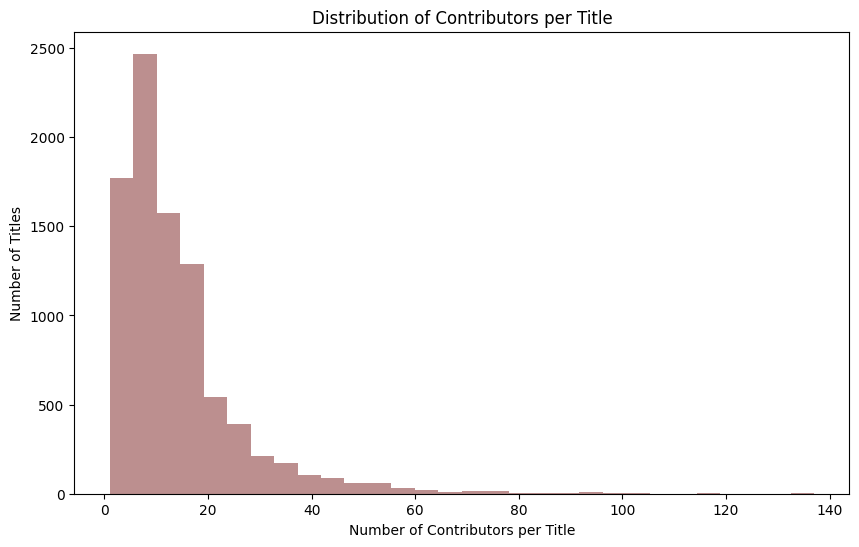

In [204]:
# count number of credits per title
credits_count = credits.groupby("id")["person_id"].count()

# basic stats if needed
print("Average contributors per title:", credits_count.mean())
print("Minimum contributors:", credits_count.min())
print("Maximum contributors:", credits_count.max())

# plot histogram for number of credits in titles
plt.figure(figsize=(10,6))
plt.hist(credits_count, bins=30, color = 'rosybrown')
plt.xlabel("Number of Contributors per Title")
plt.ylabel("Number of Titles")
plt.title("Distribution of Contributors per Title")
plt.show()

##### 1. Why did you pick the specific chart?

**A histogram was used to understand the distribution of contributors per title. It helps in visualizing how many people are typically credited in a single movie and how production scale varies across titles.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of titles include around 5 to 20 credited contributors, with an average of approximately 17 contributors per title. A small number of titles have significantly higher contributor counts, but these are rare. This indicates that the dataset mainly includes major roles such as actors and directors, not the complete production crew.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight helps in understanding the general production scale of content on the platform. Most titles appear to be moderate scale productions. If the platform wants to increase premium perception, investing in larger scale projects with higher production involvement may help.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


Based on the analysis, the platform should focus on expanding high rated and consistently performing genres such as documentary and family, as they show strong audience satisfaction despite lower availability. Increasing content in these categories can improve overall platform quality perception.

At the same time, highly available genres such as drama, thriller and action should undergo quality review to improve average ratings, as they already attract strong engagement. Improving content quality in these popular categories can strengthen user retention and long term brand credibility.

Additionally, exploring highly rated content from countries like Japan and Canada can help enhance overall platform standards. Monitoring content themes and maintaining diversity will ensure sustained audience interest and competitive growth.

# **Conclusion**

The global OTT industry continues to expand in a highly competitive and content-driven environment. Our analysis highlights strong engagement in genres such as drama and thriller, while documentary and family content show high rating potential despite lower availability. This indicates a clear opportunity to expand quality-driven niche content while simultaneously improving storytelling standards within high-volume genres. A balanced content strategy focused on both engagement and quality can strengthen user retention and overall platform positioning.

Additionally, the streaming industry does not grow only through steady expansion but also through sudden rapid growth phases driven by emerging trends and audience shifts. Continuous market analysis and data-driven content planning can help the platform identify such rising interests early and strategically invest in them. By acting proactively, the platform can not only benefit from industry growth cycles but also contribute to triggering competitive expansion within the broader OTT ecosystem.

### ***Thank you for taking the time to go through this analysis.***